### Importação dos dados



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



Faturamento total por loja:
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


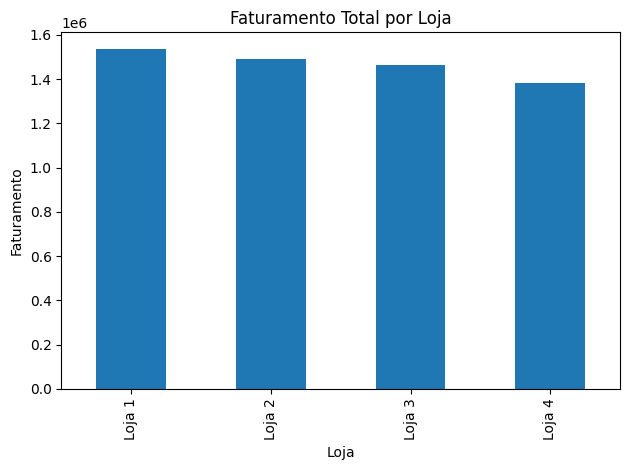

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_list = [pd.read_csv(url).assign(Loja=loja) for loja, url in urls.items()]
df = pd.concat(df_list, ignore_index=True)


faturamento_por_loja = df.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print('\nFaturamento total por loja:\n', faturamento_por_loja)
faturamento_por_loja.plot(kind='bar', title='Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento')
plt.tight_layout()
plt.show()



# 2. Vendas por Categoria



Vendas por categoria em cada loja:
 Loja    Categoria do Produto 
Loja 1  brinquedos               324
        eletrodomesticos         312
        eletronicos              448
        esporte e lazer          284
        instrumentos musicais    182
        livros                   173
        moveis                   465
        utilidades domesticas    171
Loja 2  brinquedos               313
        eletrodomesticos         305
        eletronicos              422
        esporte e lazer          275
        instrumentos musicais    224
        livros                   197
        moveis                   442
        utilidades domesticas    181
Loja 3  brinquedos               315
        eletrodomesticos         278
        eletronicos              451
        esporte e lazer          277
        instrumentos musicais    177
        livros                   185
        moveis                   499
        utilidades domesticas    177
Loja 4  brinquedos               338
        

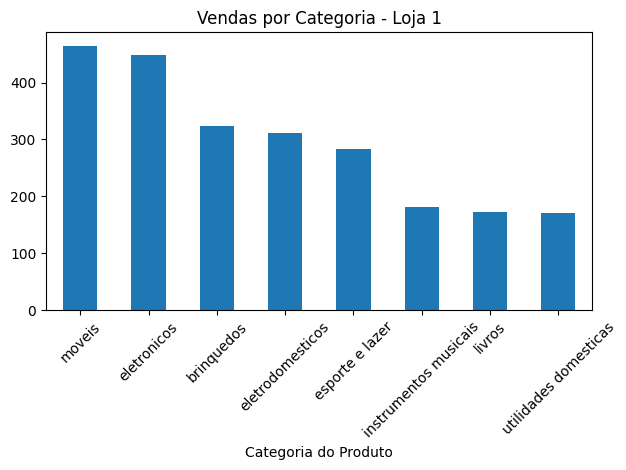

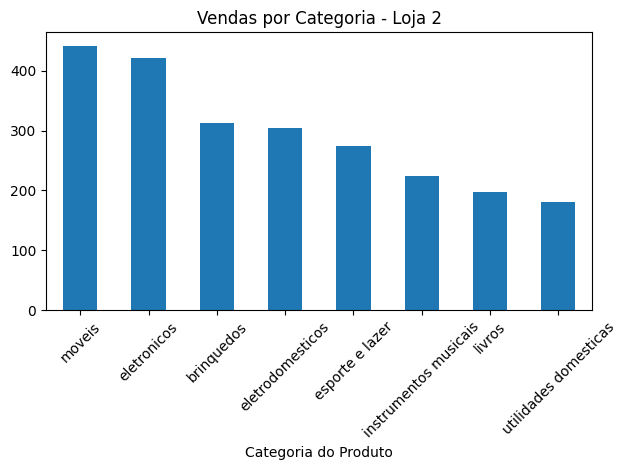

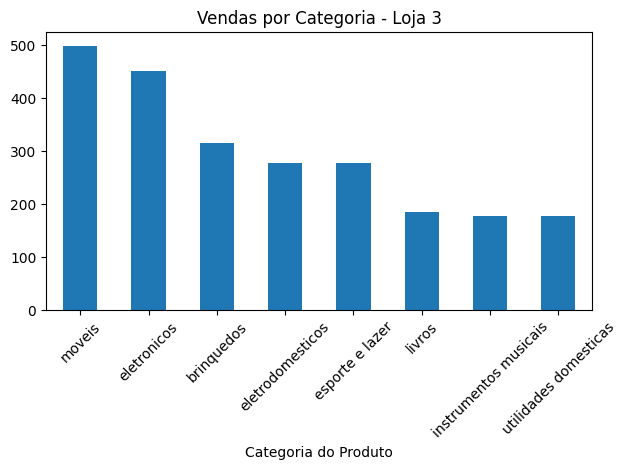

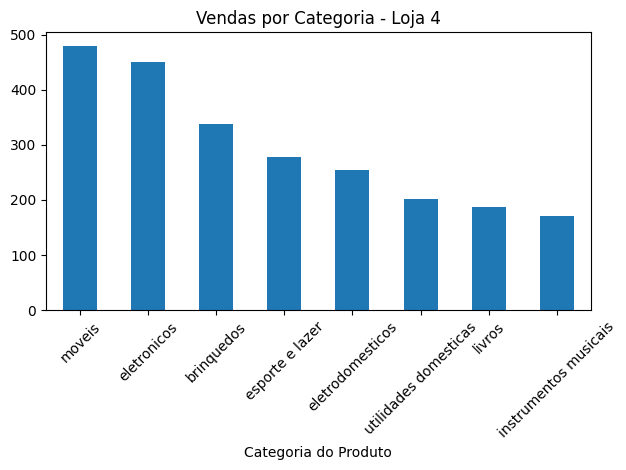

In [17]:
vendas_categoria_loja = df.groupby(['Loja', 'Categoria do Produto']).size()
print('\nVendas por categoria em cada loja:\n', vendas_categoria_loja)

for loja_nome in df['Loja'].unique():
    dados = df[df['Loja'] == loja_nome]
    contagem = dados['Categoria do Produto'].value_counts()
    contagem.plot(kind='bar', title=f'Vendas por Categoria - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 3. Média de Avaliação das Lojas


Média de avaliação por loja:
 Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


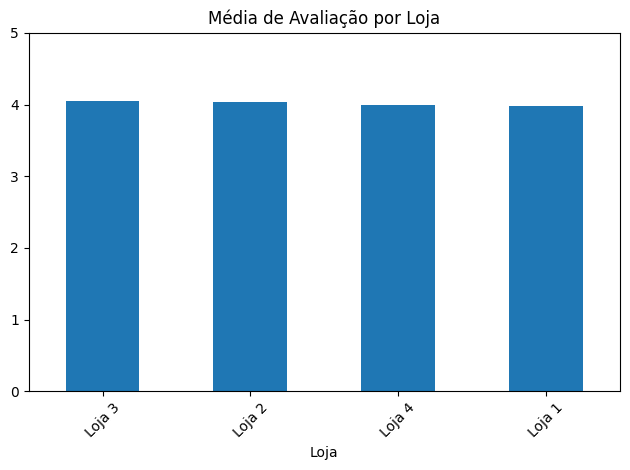

In [18]:
media_avaliacao = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print('\nMédia de avaliação por loja:\n', media_avaliacao)
media_avaliacao.plot(kind='bar', title='Média de Avaliação por Loja')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos


Top 5 Mais Vendidos - Loja 1:
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 1:
 Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


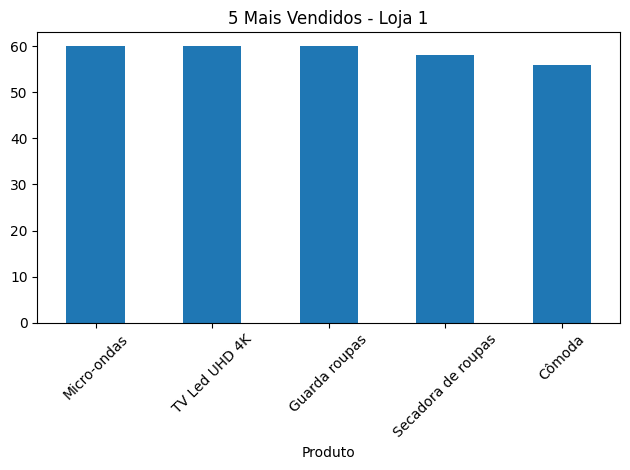

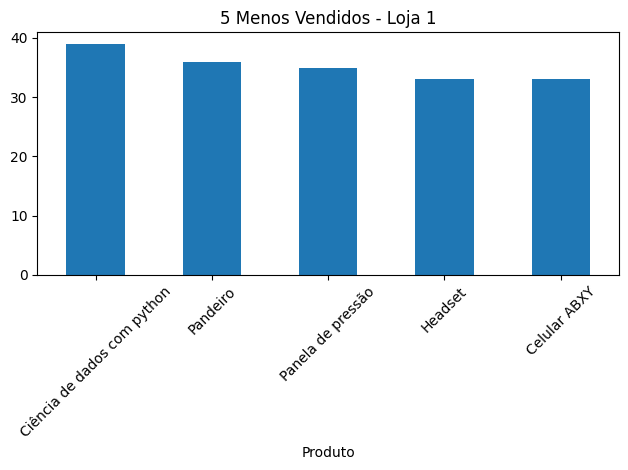


Top 5 Mais Vendidos - Loja 2:
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 2:
 Produto
Fone de ouvido       37
Poltrona             35
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64


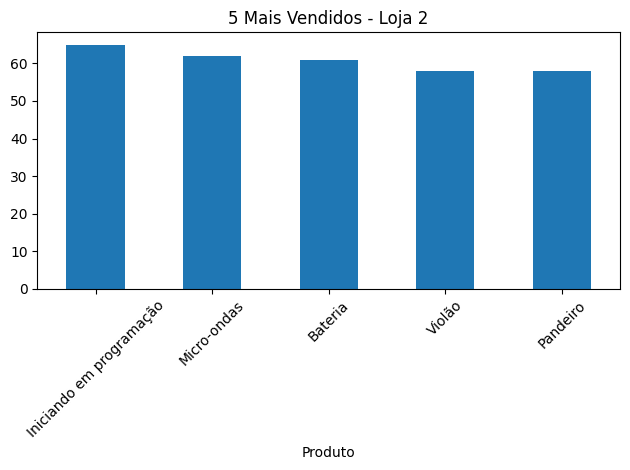

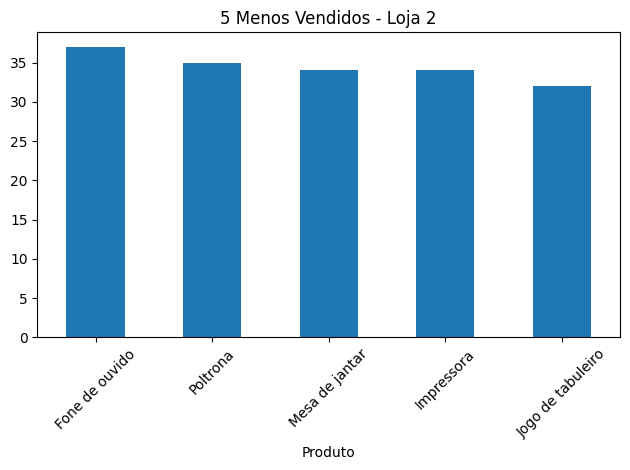


Top 5 Mais Vendidos - Loja 3:
 Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 3:
 Produto
Guitarra            38
Jogo de copos       36
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64


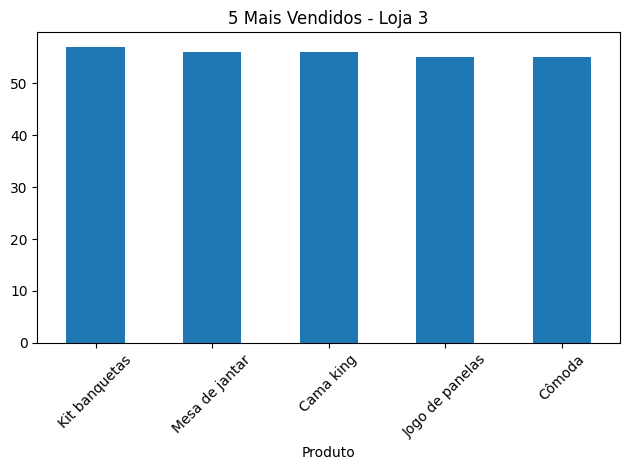

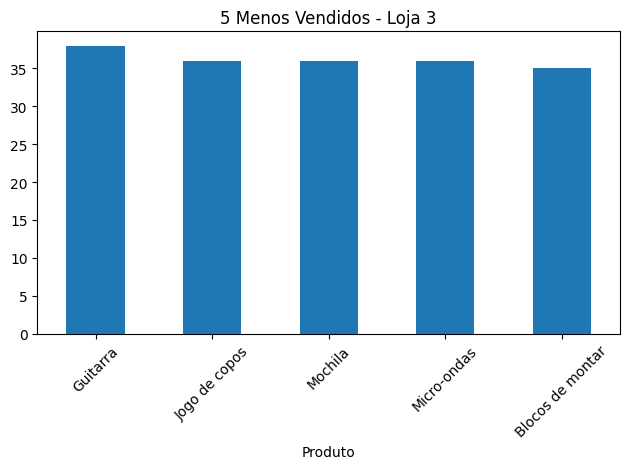


Top 5 Mais Vendidos - Loja 4:
 Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64

Bottom 5 Menos Vendidos - Loja 4:
 Produto
Geladeira                      38
Ciência de dados com python    38
Violão                         37
Guarda roupas                  34
Guitarra                       33
Name: count, dtype: int64


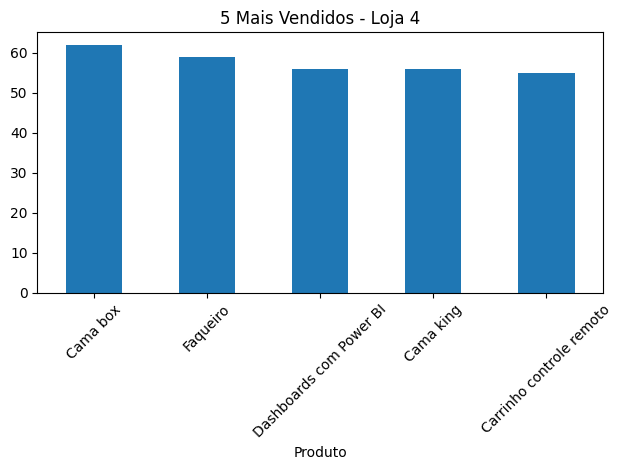

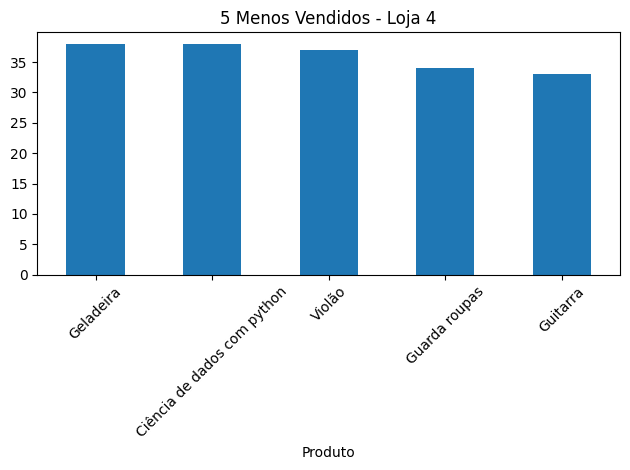

In [19]:
for loja_nome in df['Loja'].unique():
    dados = df[df['Loja'] == loja_nome]
    contagem = dados['Produto'].value_counts()

    top5 = contagem.head(5)
    bottom5 = contagem.tail(5)

    print(f'\nTop 5 Mais Vendidos - {loja_nome}:\n', top5)
    print(f'\nBottom 5 Menos Vendidos - {loja_nome}:\n', bottom5)

    top5.plot(kind='bar', title=f'5 Mais Vendidos - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    bottom5.plot(kind='bar', title=f'5 Menos Vendidos - {loja_nome}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# 5. Frete Médio por Loja


In [20]:
custo_medio_frete_loja = df.groupby('Loja')['Frete'].mean()
print('\nCusto médio de frete por loja:\n', custo_medio_frete_loja)




Custo médio de frete por loja:
 Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


RELATORIO


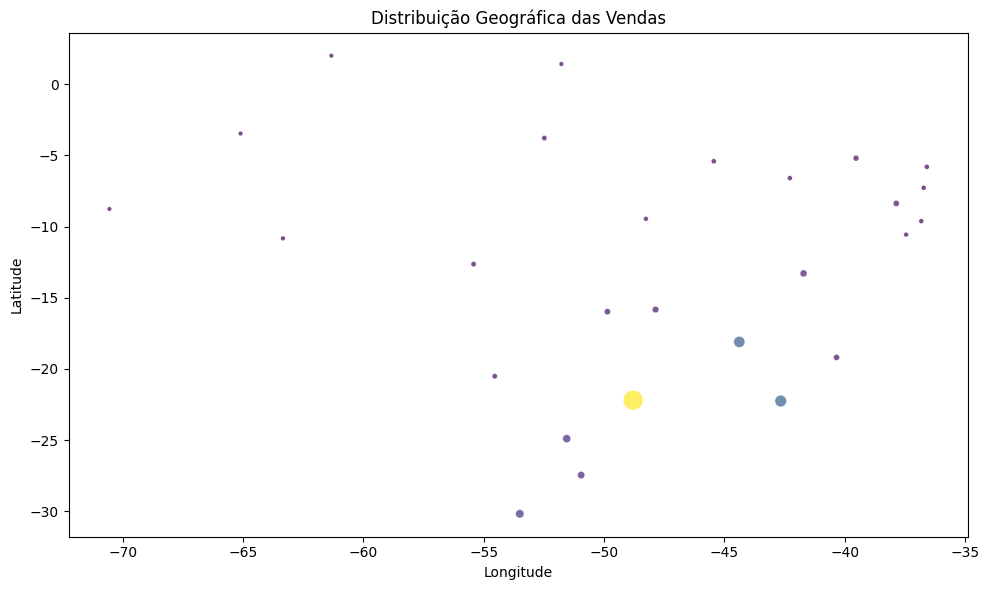

In [21]:
# O propósito desta análise foi avaliar o desempenho de quatro lojas e determinar qual delas deve ser vendida.
# Para isso, diversos fatores foram analisados, incluindo faturamento, variedade de produtos vendidos,
# satisfação dos clientes, itens mais e menos comercializados e custos de frete.

# Análise dos Fatores
# - Faturamento Total: A Loja 1 obteve a maior receita, atingindo R$ 1.534.509,12, o que a posiciona como a mais lucrativa.
#   Em contrapartida, a Loja 4 registrou o menor faturamento, com R$ 1.384.497,58, indicando um desempenho inferior nesse aspecto.
# - Diversidade de Produtos Vendidos: A Loja 4 apresentou uma distribuição equilibrada de vendas entre diferentes categorias,
#   sugerindo uma oferta variada e atrativa para os clientes. A Loja 1, por sua vez, destacou-se em algumas categorias específicas,
#   o que pode indicar um foco maior em determinados nichos.
# - Avaliação dos Clientes: A Loja 3 foi a que conquistou a melhor avaliação média (4.05), refletindo uma boa experiência de compra
#   relatada pelos clientes. Já a Loja 1 obteve a nota mais baixa (3.98), evidenciando um nível de satisfação inferior em relação às demais.
# - Custo de Frete: O menor custo médio de frete foi registrado pela Loja 4 (R$ 31.28), tornando-a mais eficiente do ponto de vista logístico.
#   Por outro lado, a Loja 1 teve o custo de frete mais elevado (R$ 34.69), o que pode representar um impacto negativo na competitividade.

# Conclusão
# Apesar do alto faturamento, a Loja 1 enfrenta desafios como um custo logístico mais alto e uma avaliação menos favorável por parte dos clientes.
# Com isso, ela se torna menos atrativa para manutenção, sendo a candidata ideal para venda. Já a Loja 4, com um custo de frete reduzido e
# uma avaliação superior, demonstra maior estabilidade e potencial para continuar operando com sucesso.

# Gráfico do Relatório:
# Além das análises apresentadas, a visualização geográfica das vendas pode oferecer um panorama da distribuição dos clientes.
# O gráfico abaixo apresenta essa concentração.

df_geografico = df.groupby(['lat', 'lon']).size().reset_index(name='Vendas')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', size='Vendas', sizes=(10, 200), data=df_geografico, hue='Vendas', palette='viridis', legend=None, alpha=0.7)

plt.title('Distribuição Geográfica das Vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()